In [5]:
# importing necessary dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore'
)

## Data Collection

In [6]:
#Loading data into pandas dataframe
df = pd.read_csv('data\student.csv')

## Exploratory Data Analysis (EDA)

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

In [8]:
# Checking number of missing values
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [9]:
# checking for duplicate values
df.duplicated().sum()

0

In [11]:
#Checking the data type od each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [12]:
# Checking unique values

df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [16]:
# Checking the statistics summary of data

df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insight

The mean of all the scores fall between the range 66 to 69

The minimum math_score is lowest for math_score i.e 0

The minimum reading_score is 17 and writingscore is 10

In [18]:
# Checking for number of unique features in categorical data

print("Categories in 'gender' variable:     ")
print(df['gender'].unique()) 
print("Categories in 'race_ethnicity' variable:     ")
print(df['race_ethnicity'].unique()) 
print("Categories in 'parental_level_of_education' variable:     ")
print(df['parental_level_of_education'].unique()) 
print("Categories in 'lunch' variable:     ")
print(df['lunch'].unique()) 
print("Categories in 'test_preparation_course' variable:     ")
print(df['test_preparation_course'].unique()) 

Categories in 'gender' variable:     
['female' 'male']
Categories in 'race_ethnicity' variable:     
['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' variable:     
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:     
['standard' 'free/reduced']
Categories in 'test_preparation_course' variable:     
['none' 'completed']


In [20]:
# Check for number of numeric and categorical features present in the dataset

numeric_features = [feature for feature in df.columns if df[feature].dtype != "O"]
categorical_features = [feature for feature in df.columns if df[feature].dtype == "O"]

print(f"The total number of numeric features is {len(numeric_features)} and the features are: {numeric_features}")
print(f"The total number of categorical features is {len(categorical_features)} and the features are: {categorical_features}")

The total number of numeric features is 3 and the features are: ['math_score', 'reading_score', 'writing_score']
The total number of categorical features is 5 and the features are: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [23]:
# Adding new columns total_score and average

df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']

df['average'] = round(df['total_score']/3, 2)

In [24]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


In [28]:
# Finding number of students who got the full marks in all scores

reading_full = df[df['reading_score']== 100]['average'].count()
math_full = df[df['math_score']== 100]['average'].count()
writing_full = df[df['writing_score']== 100]['average'].count()

print(f"Number of students who got full score in reading: {reading_full}")
print(f"Number of students who got full score in math: {math_full}")
print(f"Number of students who got full score in writing: {writing_full}")


Number of students who got full score in reading: 17
Number of students who got full score in math: 7
Number of students who got full score in writing: 14


In [29]:
# Finding number of students who got less than 20 marks in all scores

reading_20 = df[df['reading_score']<= 20]['average'].count()
math_20 = df[df['math_score'] <= 20]['average'].count()
writing_20 = df[df['writing_score'] <= 20]['average'].count()

print(f"Number of students who got less than 20 score in reading: {reading_20}")
print(f"Number of students who got less than 20 score in math: {math_20}")
print(f"Number of students who got less than 20 score in writing: {writing_20}")

Number of students who got less than 20 score in reading: 1
Number of students who got less than 20 score in math: 4
Number of students who got less than 20 score in writing: 3


Insight

From the above observations, it can be seen that most of the students did best in reading and least good in math.

## Data Visualization

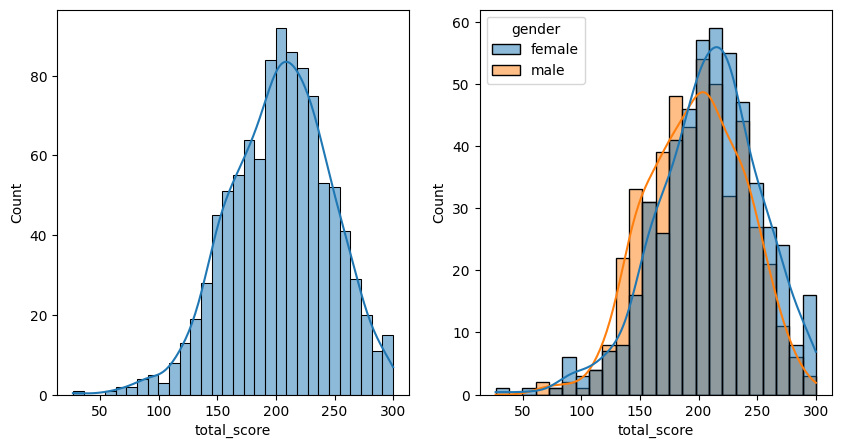

In [34]:
# Here the data is visualized effectively using Histogram and Kernel density plots

fig, axs = plt.subplots(1, 2, figsize = (10, 5))
plt.subplot(121)
sns.histplot(data = df, x = 'total_score', bins = 30, kde = True)
plt.subplot(122)
sns.histplot(data = df, x = 'total_score', kde = True, hue = 'gender')
plt.show()

In [32]:
df.shape

(1000, 10)

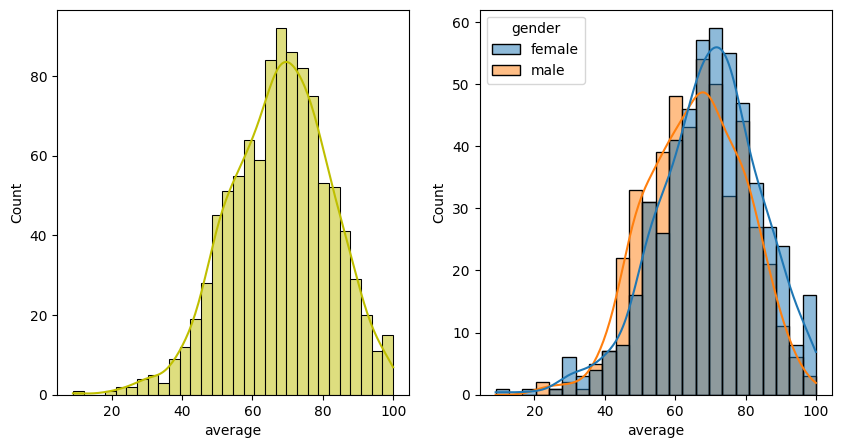

In [37]:
fig, axs = plt.subplots(1, 2, figsize = (10, 5))
plt.subplot(121)
sns.histplot(data = df, x = 'average', bins = 30, kde = True, color = 'y')
plt.subplot(122)
sns.histplot(data = df, x = 'average', kde = True, hue = 'gender')
plt.show()

From the graphs, it can be observed that females have performed well compared to males

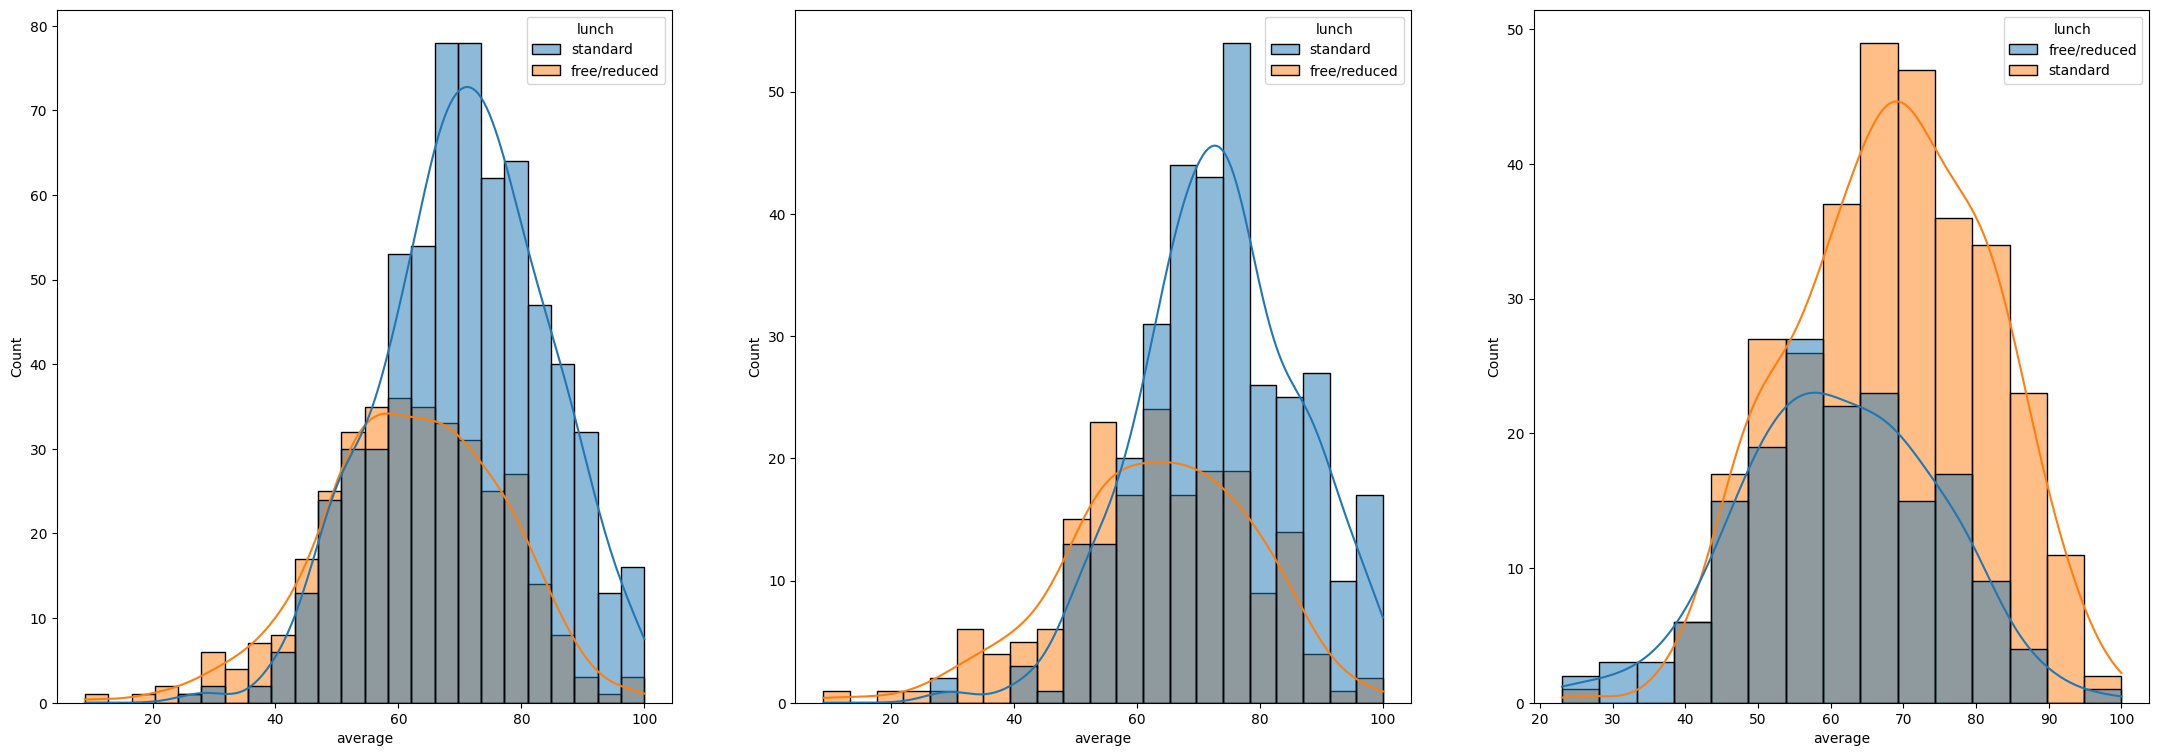

In [43]:
# Average marks comparison in terms of lunch for all, male and female
plt.subplots(1,3,figsize=(27,9))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

Those who have taken standard lunch have scored highest compared to free/reduced

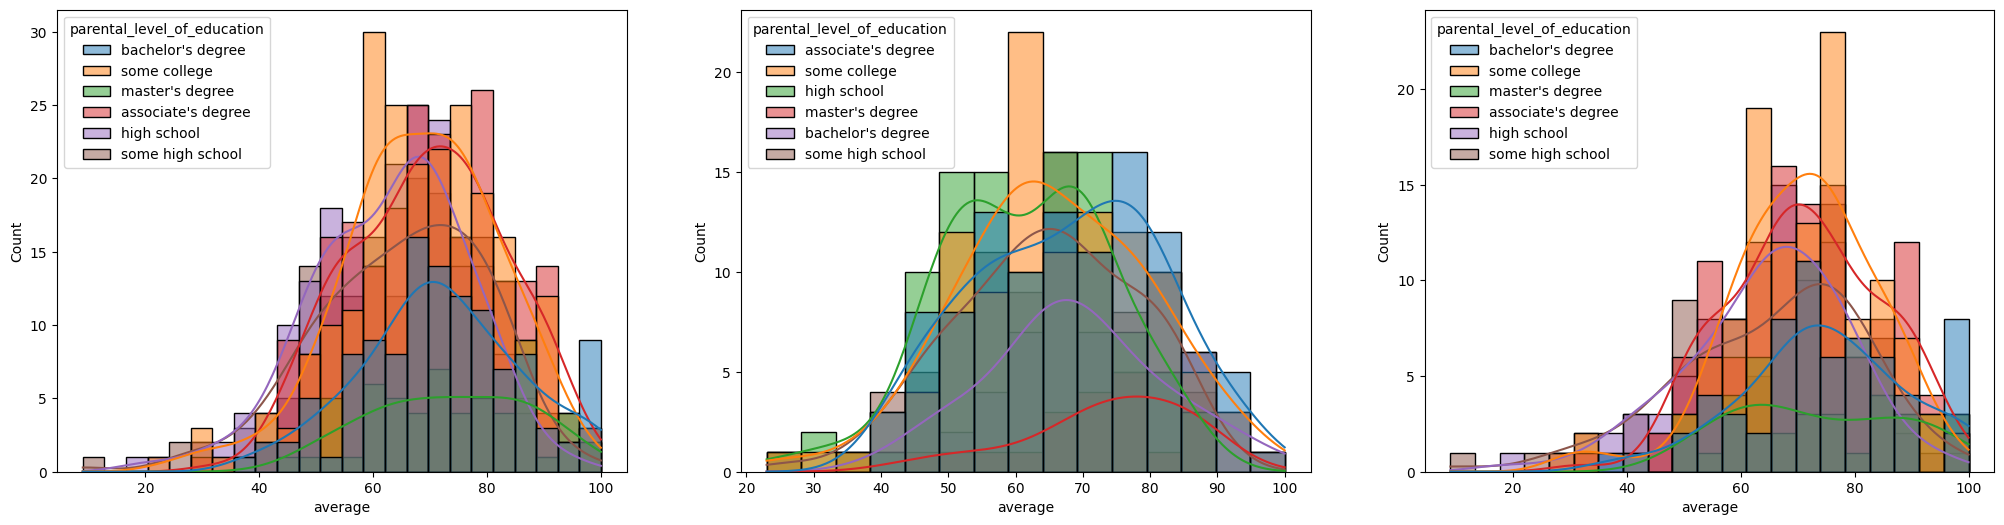

In [44]:
#Average marks comparison in terms of parental level of education
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

Parent level of education does not play that much importance in students' performance. 

Some male sudents whose parental education is associate's degree or master's degree performed well.



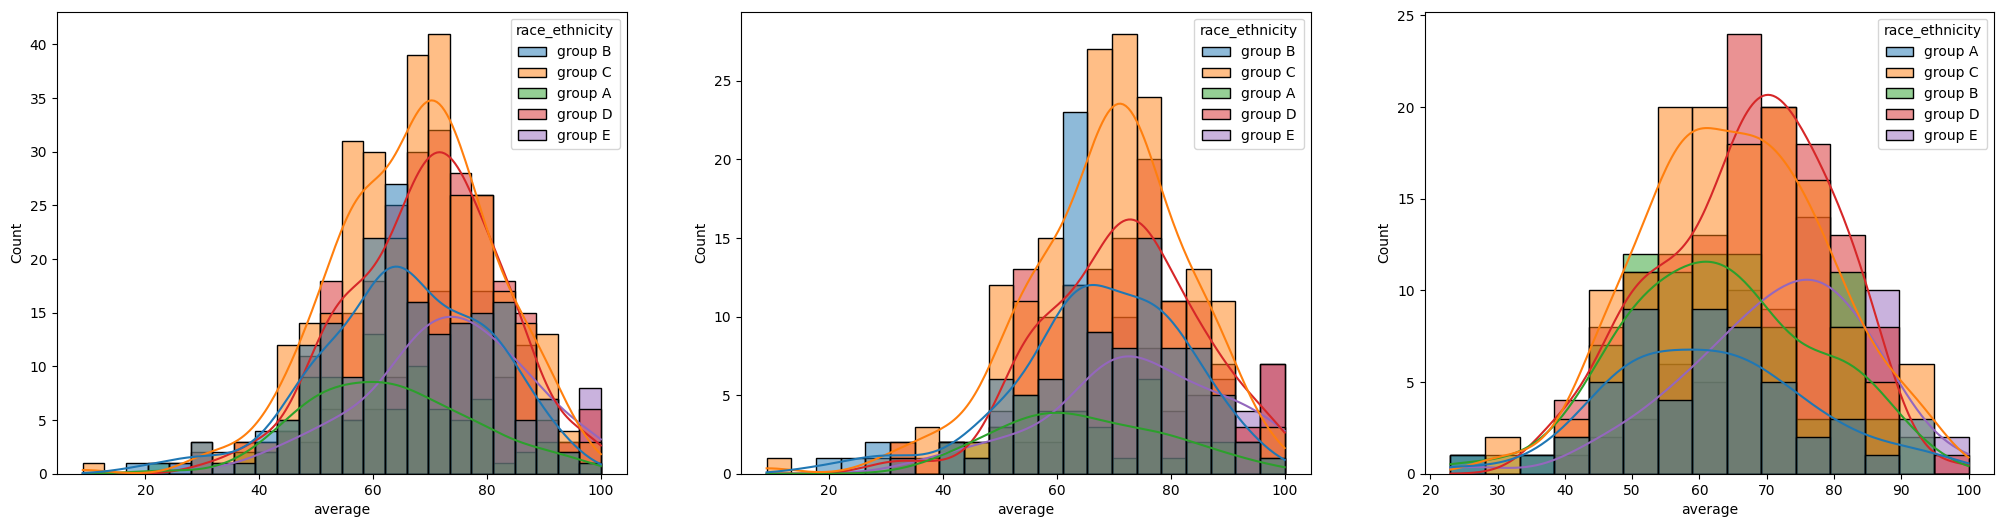

In [45]:
# Average marks comparison in terms of race ethnicity

plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
ax =sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

Students of group C performed well when all students are compared. Students of group A and group B performed bad.



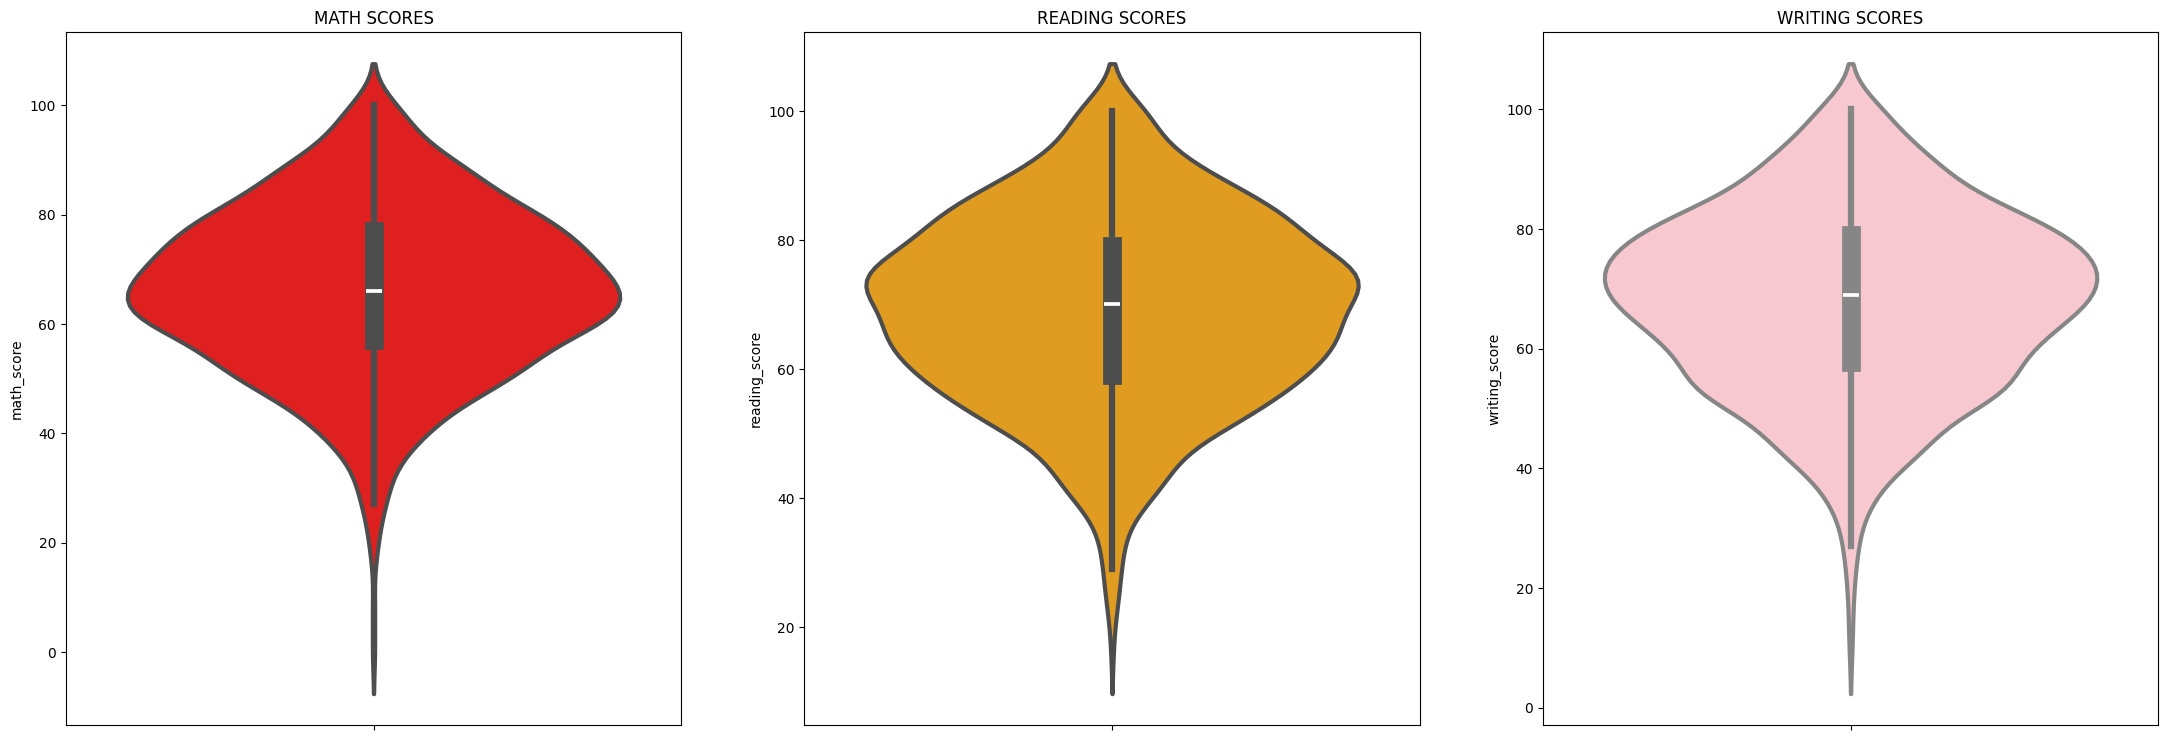

In [50]:
# Comparison of marks of all subjects
fig, axs = plt.subplots(1,3, figsize = (27, 9))
plt.subplot(1, 3, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 3, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='orange',linewidth=3)
plt.subplot(1, 3, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='pink',linewidth=3)
plt.show()

Most of the students got marks in the range of 50-80 in writing_score and reading_score. And 60-80 in maths. 

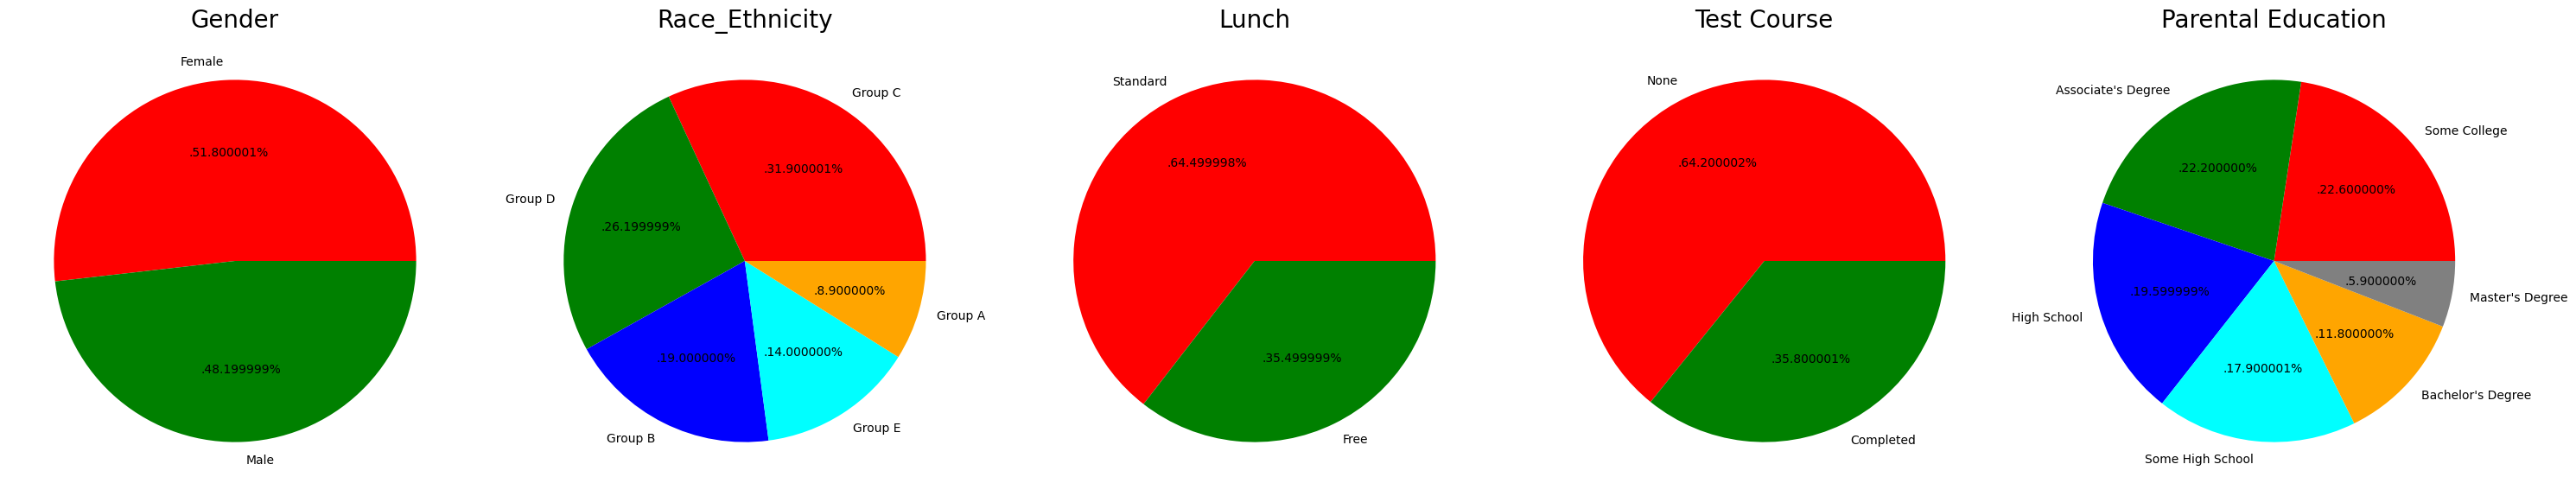

In [53]:
# Multivariate analysis using pieplots
plt.rcParams['figure.figsize'] = (30, 15)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race_Ethnicity', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()



Number of female and male students are almost equal.

Group C has the highest number of students then cames Group D

Most of the students take standard lunch

Most of the students did not complete the test course preparation

Most of the students' parents are from some college and then comes the associate degree.

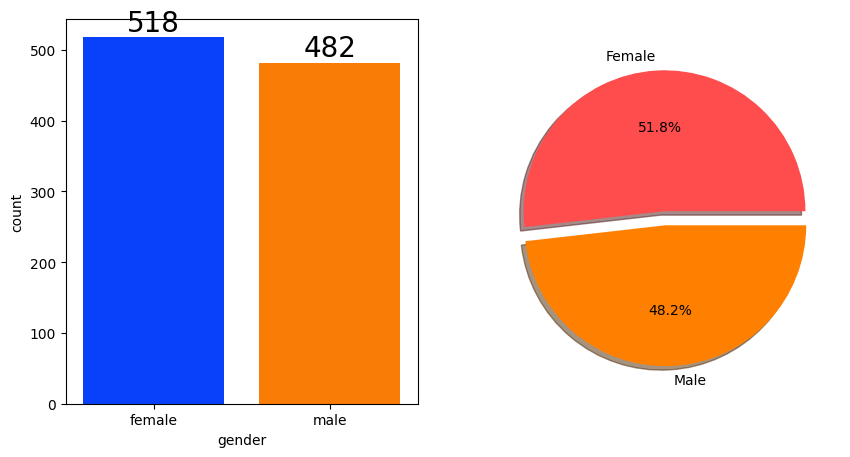

In [55]:
# Feature wise visualization

# Univariate Analysis

f,ax=plt.subplots(1,2,figsize=(10,5))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Female','Male'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

There are more number of female students.

NUmber of female students are 518 (52%) and male students are 482 (48%). 

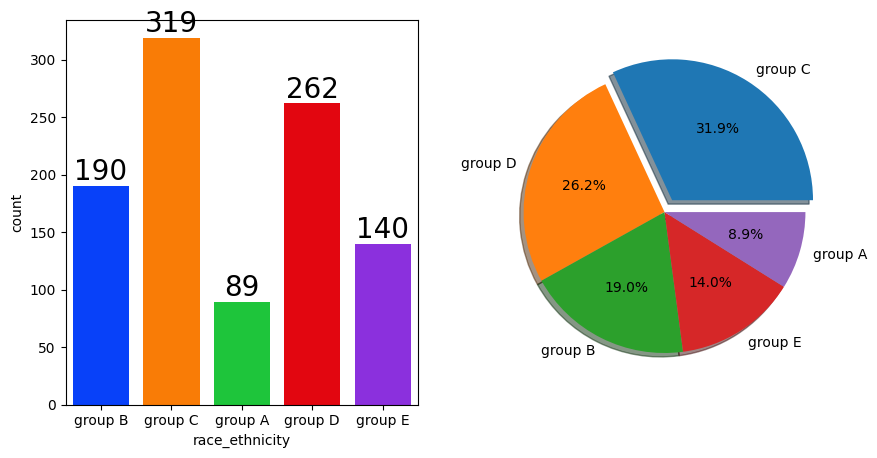

In [73]:
# Univariate and bivariate analysis of race_ethnicity
f,ax=plt.subplots(1,2,figsize=(10, 5))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

Group C has the highest number of students 319 (32%)

Group A has the least number of students 89 (9%)

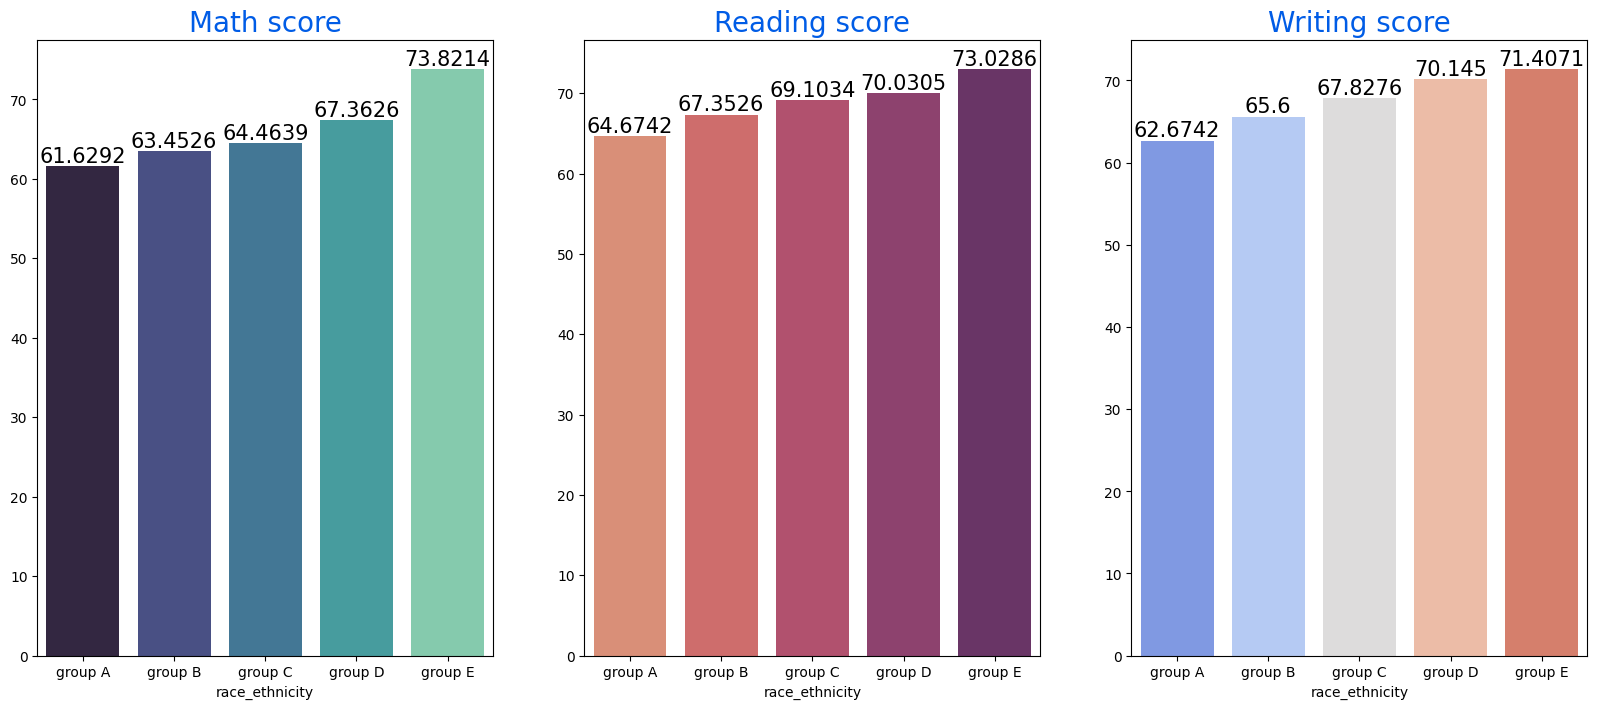

In [69]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

Group E students has the performed best in all the subjects when compared to other groups

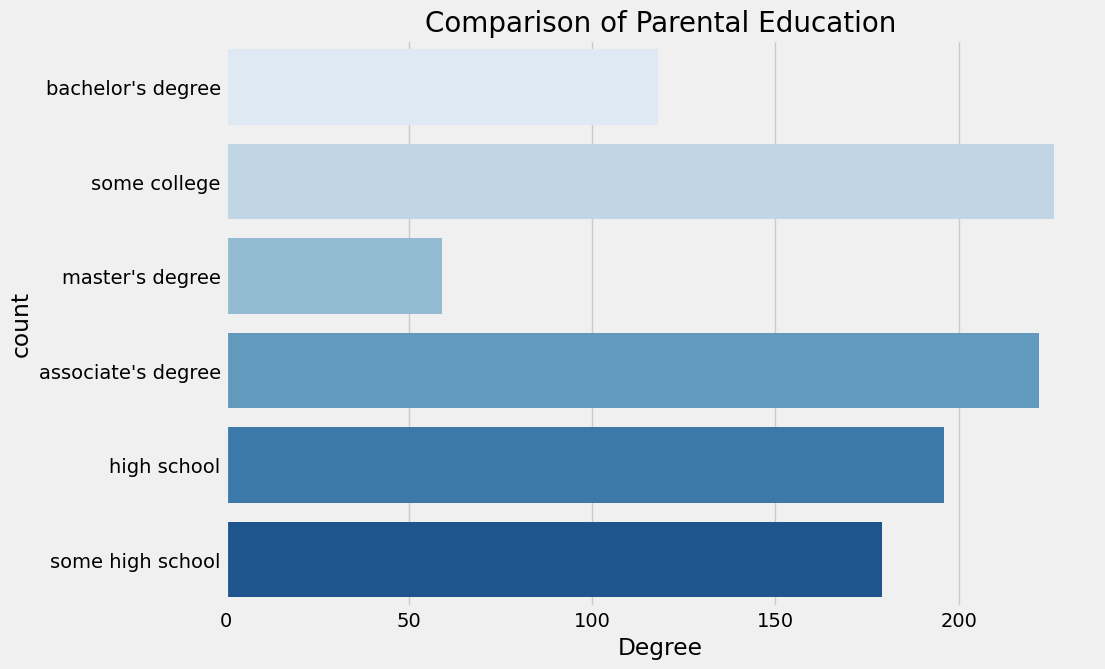

In [75]:
# Univariate and Bivariate analysis of parental_level_of_education
plt.rcParams['figure.figsize'] = (10, 7)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

Most of the students' parents are from some college

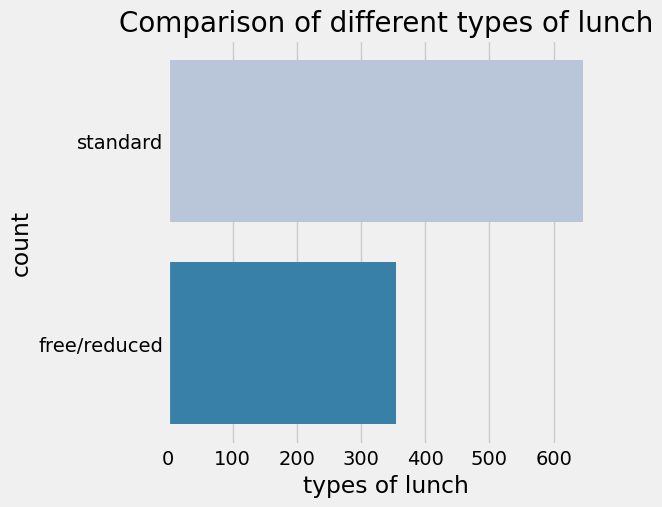

In [81]:
# Univariate and Bivariate analysis of lunch feature
plt.rcParams['figure.figsize'] = (5, 5)

sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 10, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

Most of the students take the standard lunch

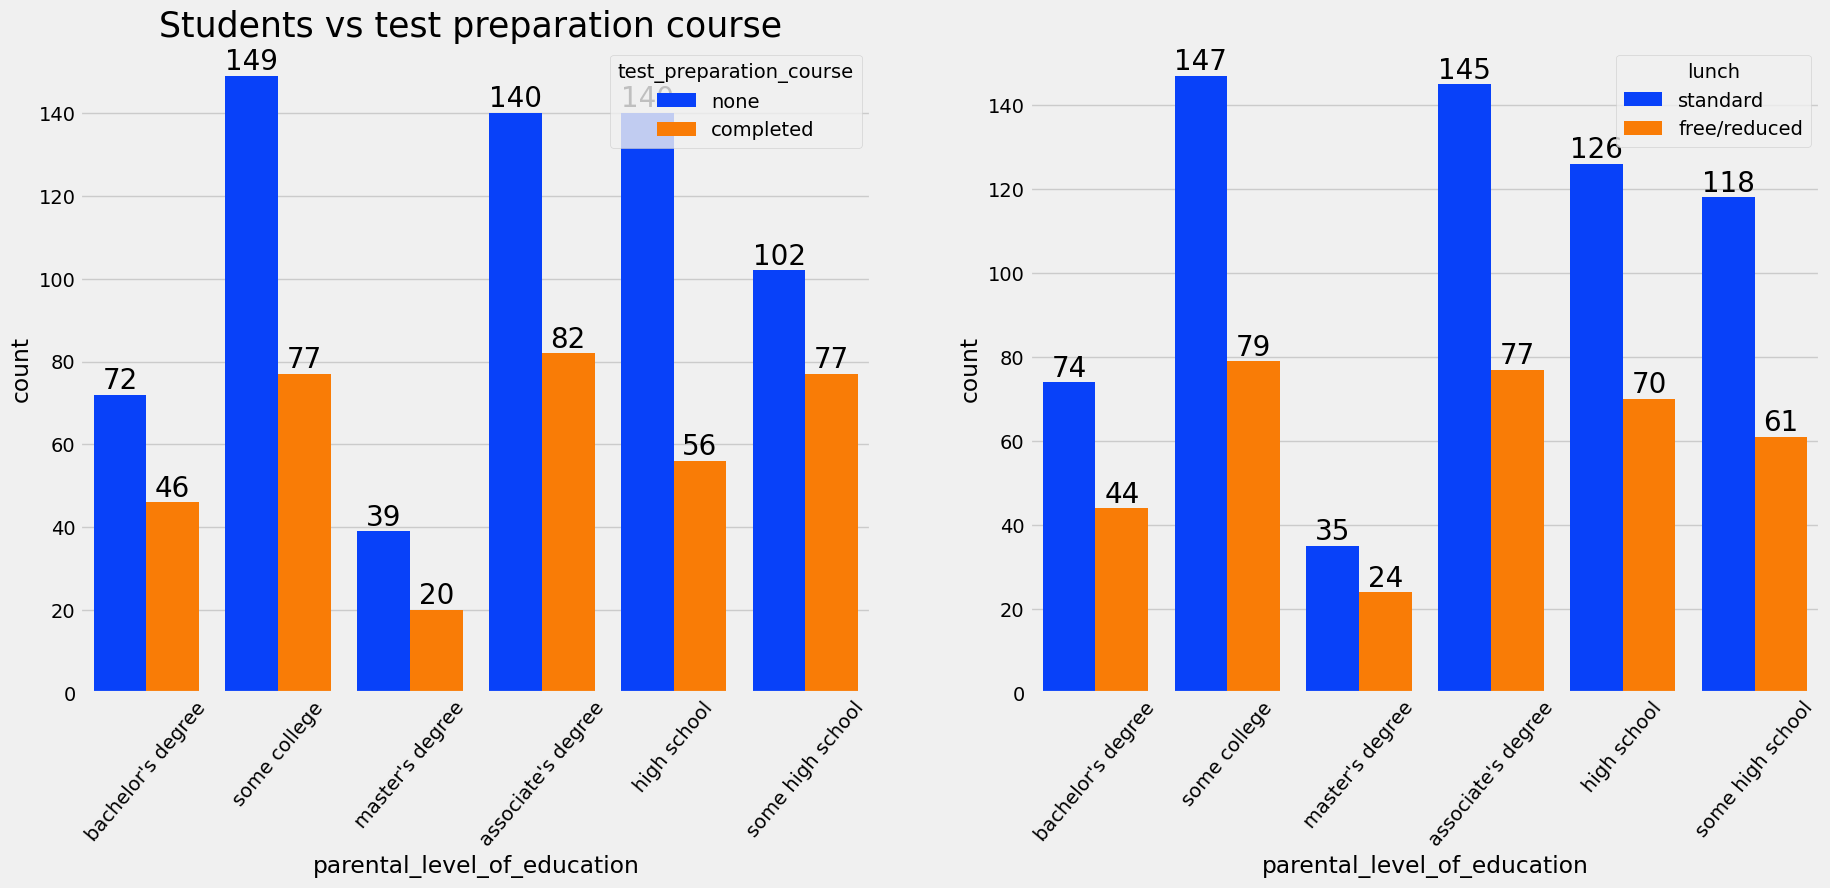

In [89]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
ax[0].tick_params(axis = 'x', rotation = 50)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
    
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
ax[1].tick_params(axis = 'x', rotation = 50)
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20) 

<Axes: xlabel='lunch', ylabel='writing_score'>

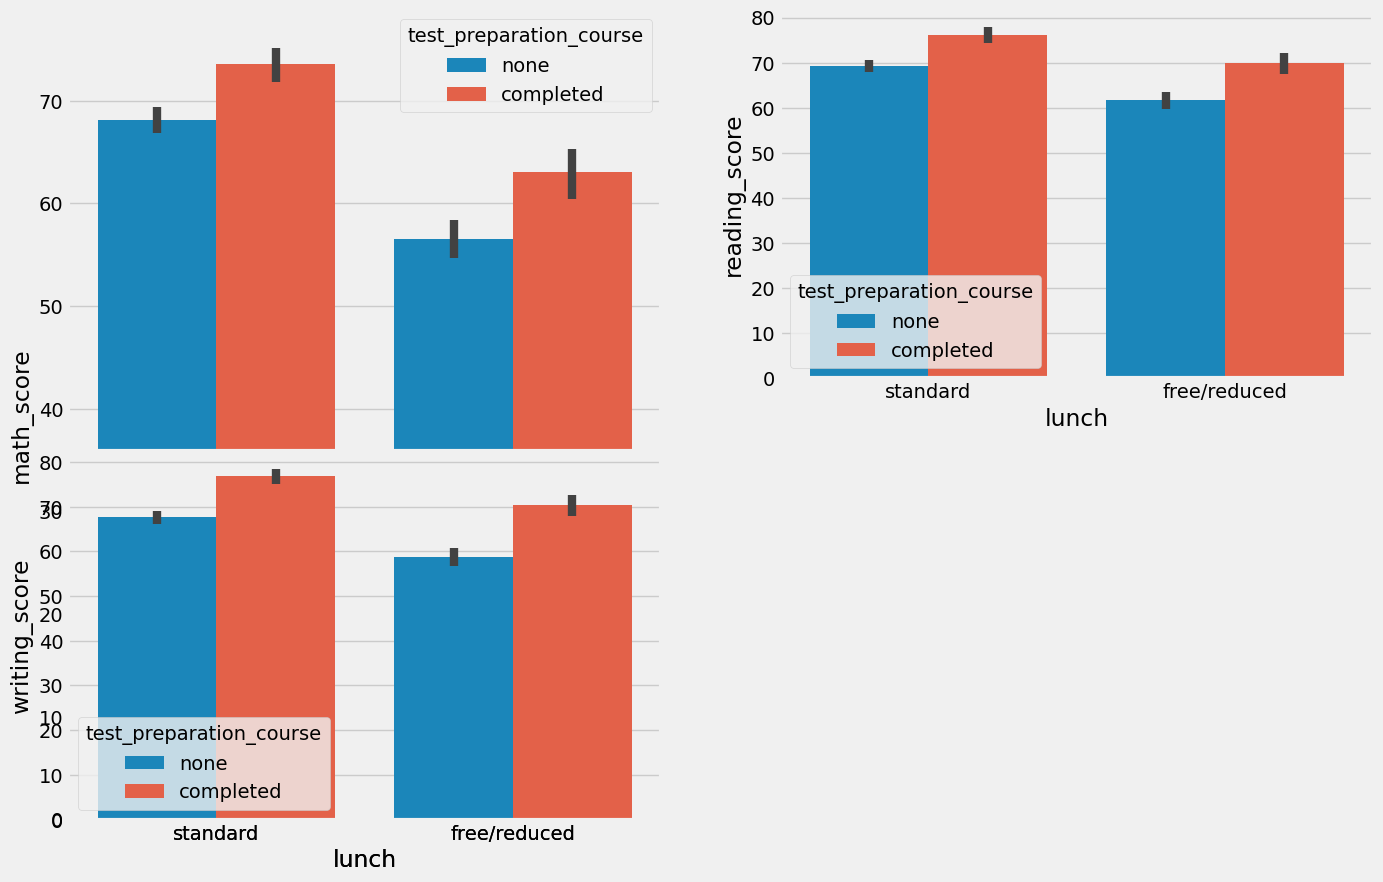

In [95]:
# Bivariant analysis of test_preparation_course

plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

Students who have completed the test course hve scored highest in all the subjects

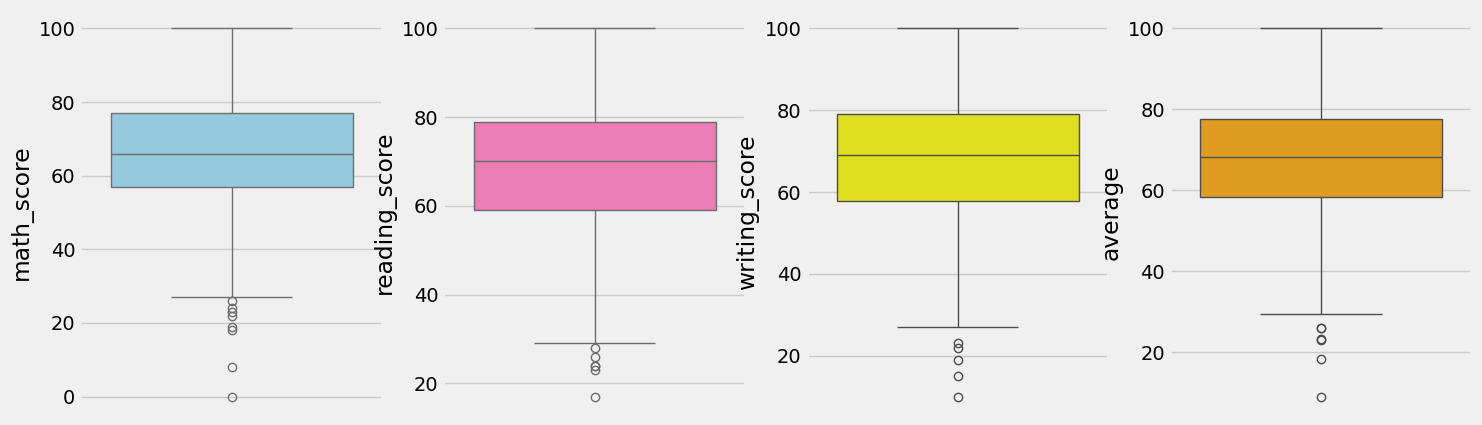

In [97]:
# Outlier detection

plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='orange')
plt.show()

All the scores have the outliers

math_score has highest number of outliers.



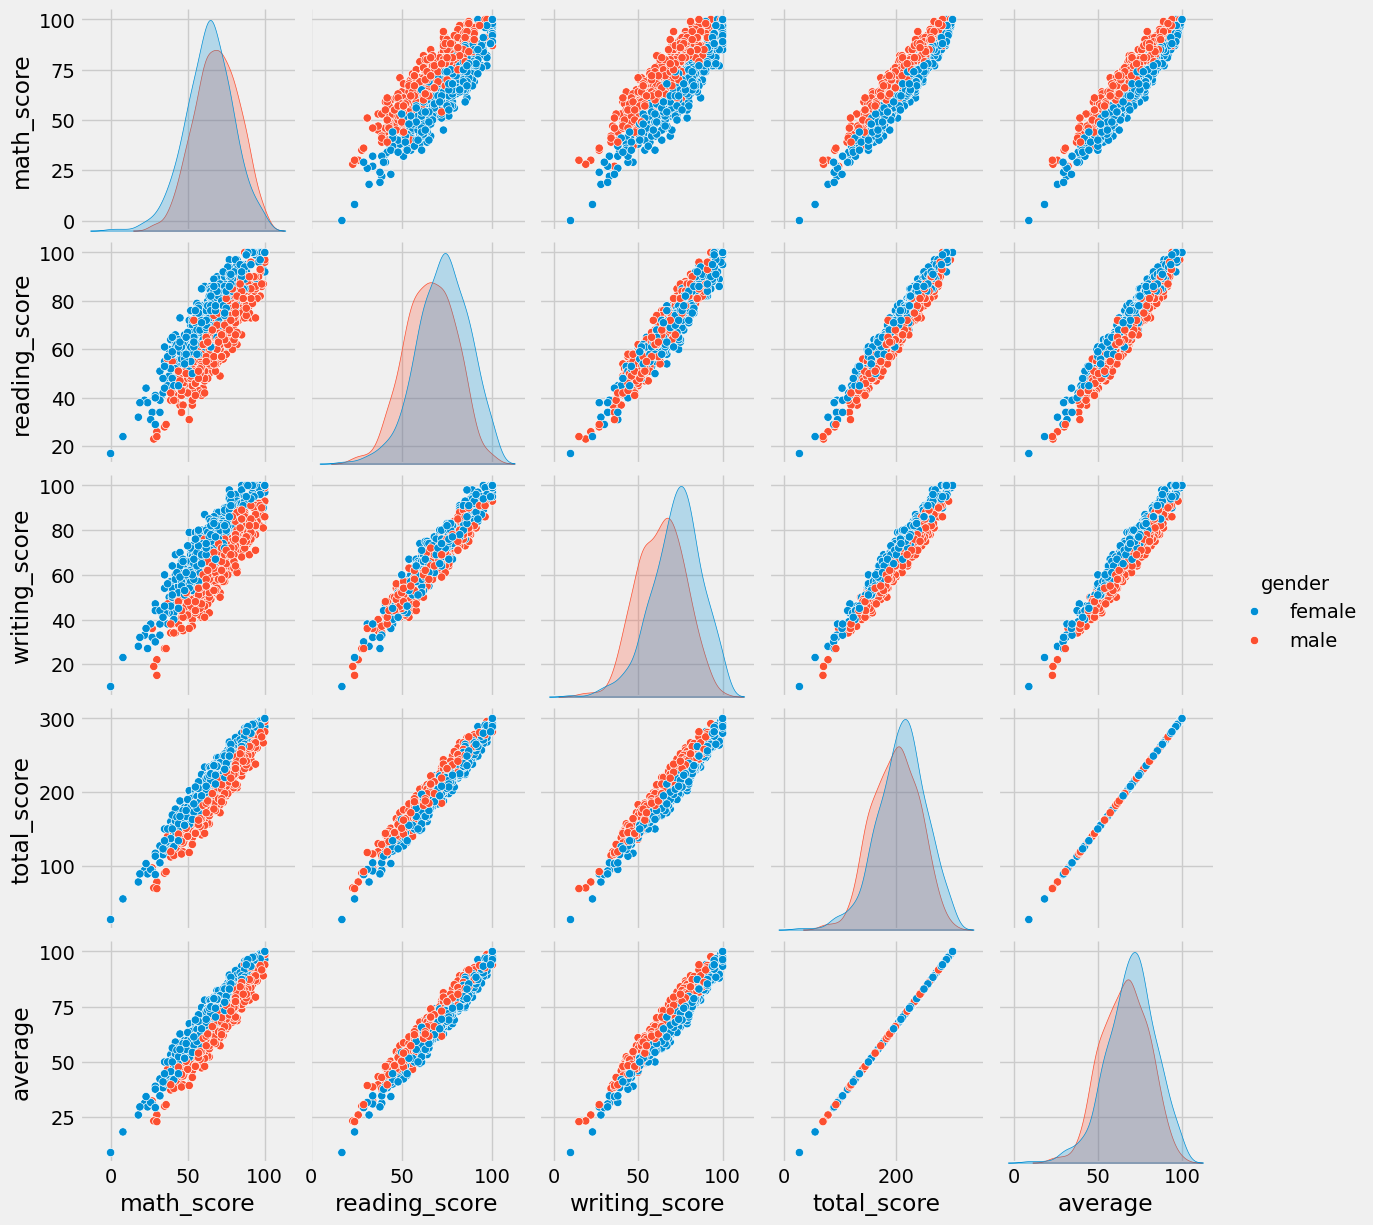

In [98]:
# Multivariate analysis using pairplot

sns.pairplot(df, hue = 'gender')
plt.show()

Here all the scores increase linearly with each other